# Recherche d'hyperparamètres avec sklearn

Imports

In [12]:
import data
import model_utils
from sklearn.model_selection import GridSearchCV

Chargement des données

In [2]:
files = {"train": "./res/train.csv", "test": "./res/test.csv"}
files["train"] = data.open_otto_csv(files["train"])
files["test"] = data.open_otto_csv(files["test"])

Fromattage des données

In [3]:
train_x, train_y = data.get_x_y(files["train"])

## Cross validation

Nous utiliserons la méthode _holdout_ pour les tests avec les paraèmtres optimaux trouvés

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import data_info

Séparation des données en un ensemble d'apprentissage et un de validation

Du fait que la recherche d'hyperparamètres _via_ GridSearchCV est très couteuse, nous minimiserons la taille de l'ensemble d'apprentissage à 40% pour 60% des données sur l'ensemble de validation

Cependant pour le test avec les meilleurs hyperparamètres choisis, nous utiliserons 80% pour l'apprentissage et 20% pour la validation)

Le code suivant fait la répartition pour GridSearchCV :

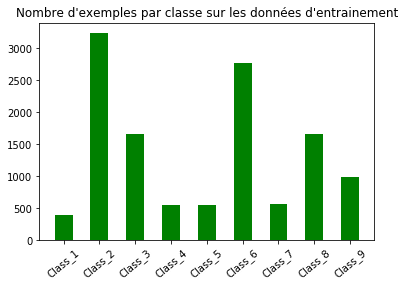

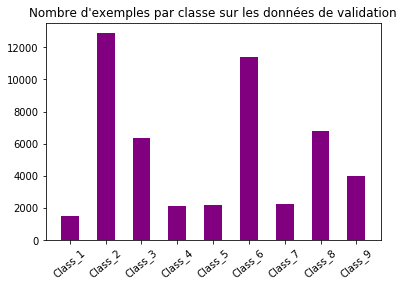

49503


In [6]:
test_tx, test_vx, test_ty, test_vy = train_test_split(train_x, train_y, test_size=0.8, random_state=42)

# Nombre d'exemples par classe pour les données d'entrainement
count_labels_t = data_info.mk_dict_labels(test_ty)
data_info.plot_hist(count_labels_t, "train_data")

# Nombre d'exemples par classe pour les données de validation
count_labels_v = data_info.mk_dict_labels(test_vy)
data_info.plot_hist(count_labels_v, "valid_data")

print(len(test_vx))

Puis la séparation pour le test final :

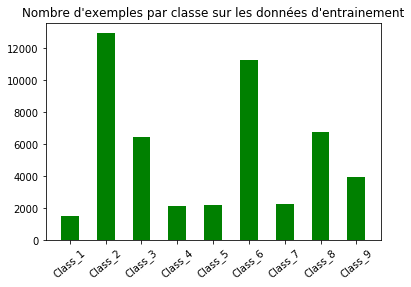

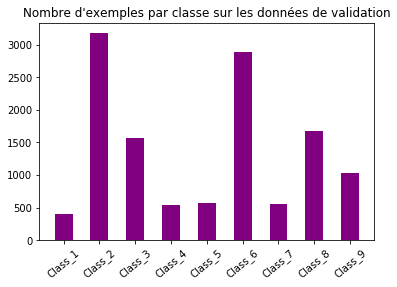

12376


In [7]:
# Split des données en partition de train et partition de validation
# 20% -> train
# 80% -> validation
data_train, data_valid, labels_train, labels_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Nombre d'exemples par classe pour les données d'entrainement
count_labels_t = data_info.mk_dict_labels(labels_train)
data_info.plot_hist(count_labels_t, "train_data")

# Nombre d'exemples par classe pour les données de validation
count_labels_v = data_info.mk_dict_labels(labels_valid)
data_info.plot_hist(count_labels_v, "valid_data")

print(len(data_valid))

## Recherche des meilleurs paramètres pour KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
paramsKNN = {'n_neighbors' : [4,5,6],
             'weights'     : ['uniform', 'distance'],
             'algorithm'   : ['ball_tree', 'kd_tree', 'brute', 'auto'],
             'leaf_size'   : [20, 30],
             'p'           : [1,2]}

knn = GridSearchCV(KNeighborsClassifier(), param_grid = paramsKNN, cv=3)
knn.fit(test_tx, test_ty)

print(knn.best_params_)

6187
{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}


Test avec les paramètres optimaux

In [24]:
knnOptim = KNeighborsClassifier(n_neighbors = 6, weights = 'distance', algorithm = 'brute', leaf_size = 20, p = 2)
knnOptim.fit(data_train, labels_train)

y_predOptimKNN = knnOptim.predict(data_valid)
y_predOptimKNN_probas = knnOptim.predict_proba(data_valid)

model_utils.evaluate_model(labels_valid, y_predOptimKNN, y_predOptimKNN_probas)

f1_score precision : (version sklearn) 0.7859400968452307
La log-loss est de :  2.013001174242348
evaluation (version Sam) : 
9786 / 12376
Precision : 0.790724


## Recherche pour SVC

In [9]:
import sklearn.svm as svm

In [26]:
paramsSVC = {'C'      : [1,10,100,1000],
             'kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
             'gamma'  : [1e-3, 1e-4],
             'tol'    : [1e-3, 1e-4]}

svc = GridSearchCV(svm.SVC(max_iter = 1000), param_grid = paramsSVC)
svc.fit(test_tx, test_ty)

print(svc.best_params_)

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'tol': 0.001}


/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Test avec les paramètres optimaux

In [11]:
svc = svm.SVC(max_iter = 1000, C = 10, gamma = 0.001, kernel = 'rbf', tol = 0.001, probability=True)
svc.fit(data_train, labels_train)

y_predOptimSVC = svc.predict(data_valid)
y_predOptimSVC_probas = svc.predict_proba(data_valid)

model_utils.evaluate_model(labels_valid, y_predOptimSVC, y_predOptimSVC_probas)

## Peu efficace

/home/samuel/env/lib/python3.5/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


f1_score precision : (version sklearn) 0.6107105352232192
La log-loss est de :  0.7564491022290651
evaluation (version Sam) : 
7567 / 12376
Precision : 0.611425


## Recherche pour MLP

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
paramMLP = {'solver' : ['sgd', 'adam'],
            'hidden_layer_sizes' : [(30,), (30,15), (50,), (50,25)],
            'learning_rate' : ['adaptive', 'constant']}

mlpOptim = GridSearchCV(MLPClassifier(), param_grid = paramMLP)
mlpOptim.fit(test_tx, test_ty)

print(mlpOptim.best_params_)

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

{'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}


/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
mlp_Optim_clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (50,), learning_rate = 'constant')
mlp_clf.fit(data_train, labels_train)

y_predOptimMLP = mlp_clf.predict(data_valid)
y_predOptimMLP_proba = mlp_clf.predict_proba(data_valid)

model_utils.evaluate_model(labels_valid, y_predOptimMLP, y_predOptimMLP_proba)

f1_score precision : (version sklearn) 0.7793973092566393
evaluation (version Sam) : 
9706 / 12376
Precision : 0.784260


/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
